In [19]:
#Import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import statsmodels.api as sm
from scipy import stats

# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

### **Attribute Information**

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [133]:
#Read dataset
df = pd.read_csv('heart.csv')
print(heart_disease.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Univariate Analysis


In [9]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file="report_prfile.html")


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

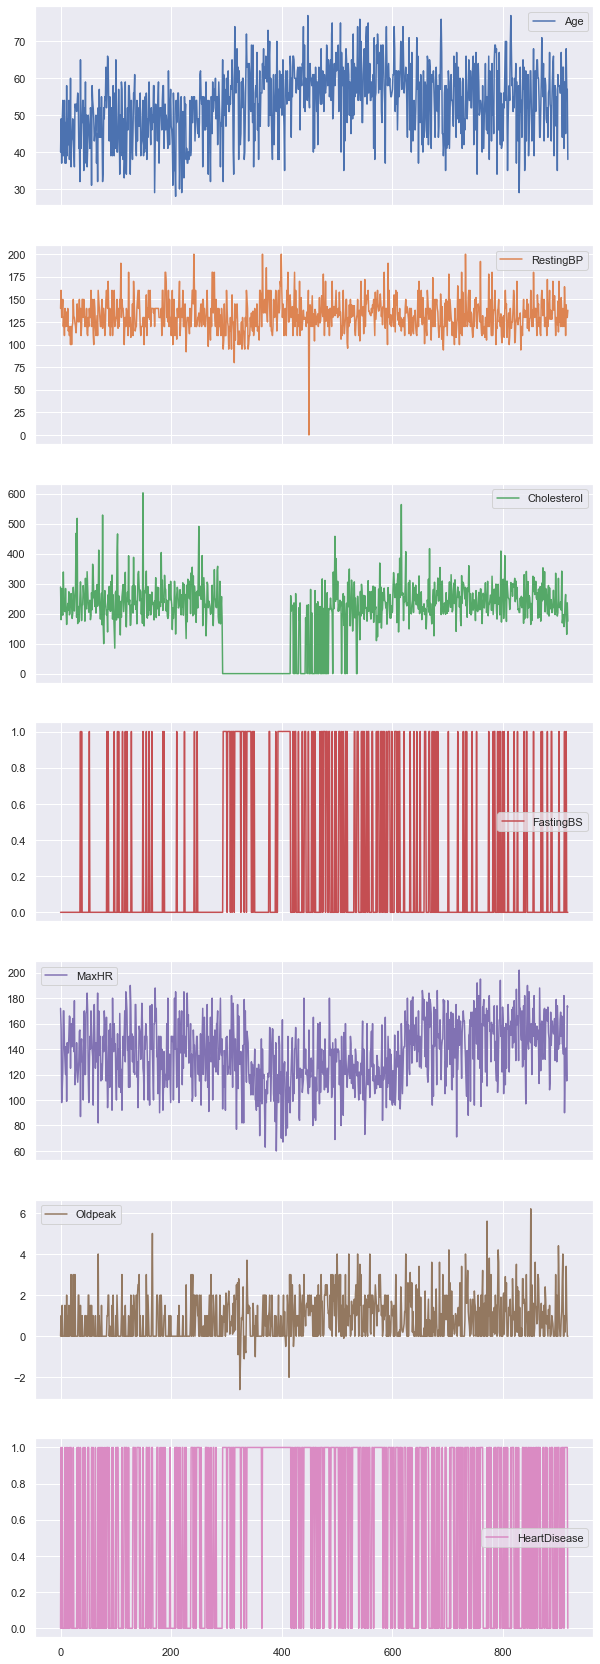

In [177]:
#Let's start  looking  the observations around the data frame

df.plot(subplots=True,figsize=(10, 30))


In [110]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [10]:
#Tabla de frecuencias
tabla_frec = df['Sex'].value_counts()
tabla_frec

M    725
F    193
Name: Sex, dtype: int64

In [24]:
#Tabla de frecuencias relativa (funciona con porcentajes)
tabla_frec_rel = (df['Sex'].value_counts() / len(df['Sex']))*100
tabla_frec_rel

M    78.976035
F    21.023965
Name: Sex, dtype: float64

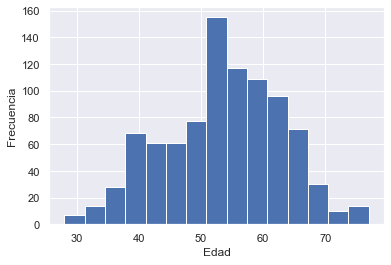

In [23]:
df['Age'].hist(bins=15)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

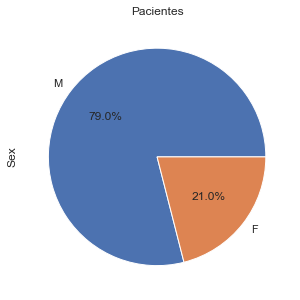

In [25]:
tabla_frec_rel.plot(kind='pie', title='Pacientes', autopct='%.1f%%', figsize=(5,5))
plt.show()

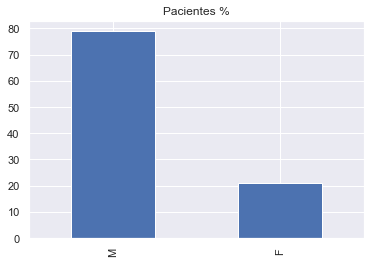

In [26]:
tabla_frec_rel.plot(kind ='bar', title='Pacientes %')
plt.show()

In [44]:
def kde_hist(df,xlabel,ylabel,title):
    fig,ax = plt.subplots(figsize=(16,8))

    df[xlabel].plot(kind='hist',density=True)
    df[xlabel].plot(kind='kde')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title,size=20,pad=10)
    ax.set_xlim(25,80)

    quant25,quant50,quant75 = df[xlabel].quantile(0.25),df[xlabel].quantile(0.5),df[xlabel].quantile(0.75)
    quants = [[quant25,0.8,0.2],[quant50,0.95,0.4],[quant75,0.8,0.6]]
    for i in quants:
        plt.axvline(x=i[0],alpha=i[1],ymax=i[2],linestyle=':',color='black')

    ax.text(quant25, 0.012, "25th", size = 22, alpha = 0.85)
    ax.text(quant50, 0.025, "50th", size = 25, alpha = 1)
    ax.text(quant75, 0.035, "75th", size = 22, alpha = 0.85)

    ax.grid(False)
    plt.show()

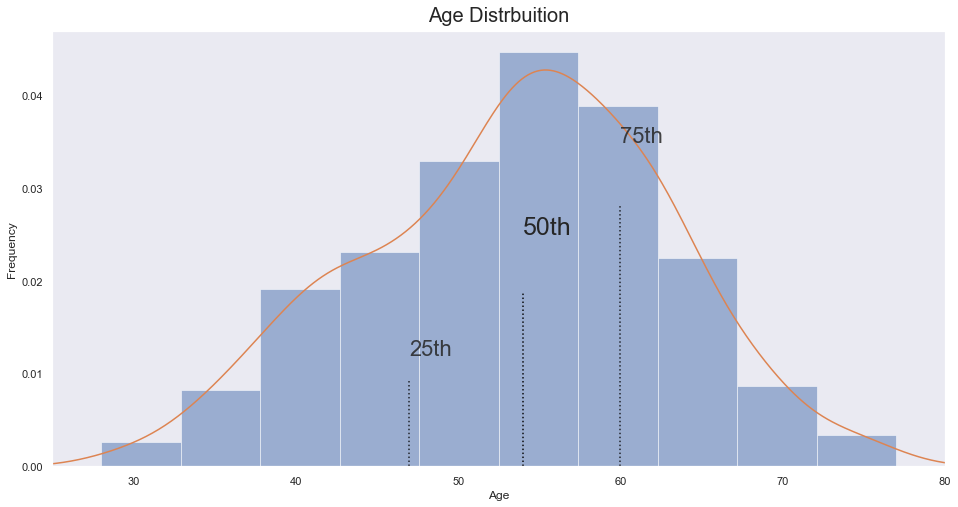

In [42]:
kde_hist(df,'Age','Frequency','Age Distrbuition')

In [139]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

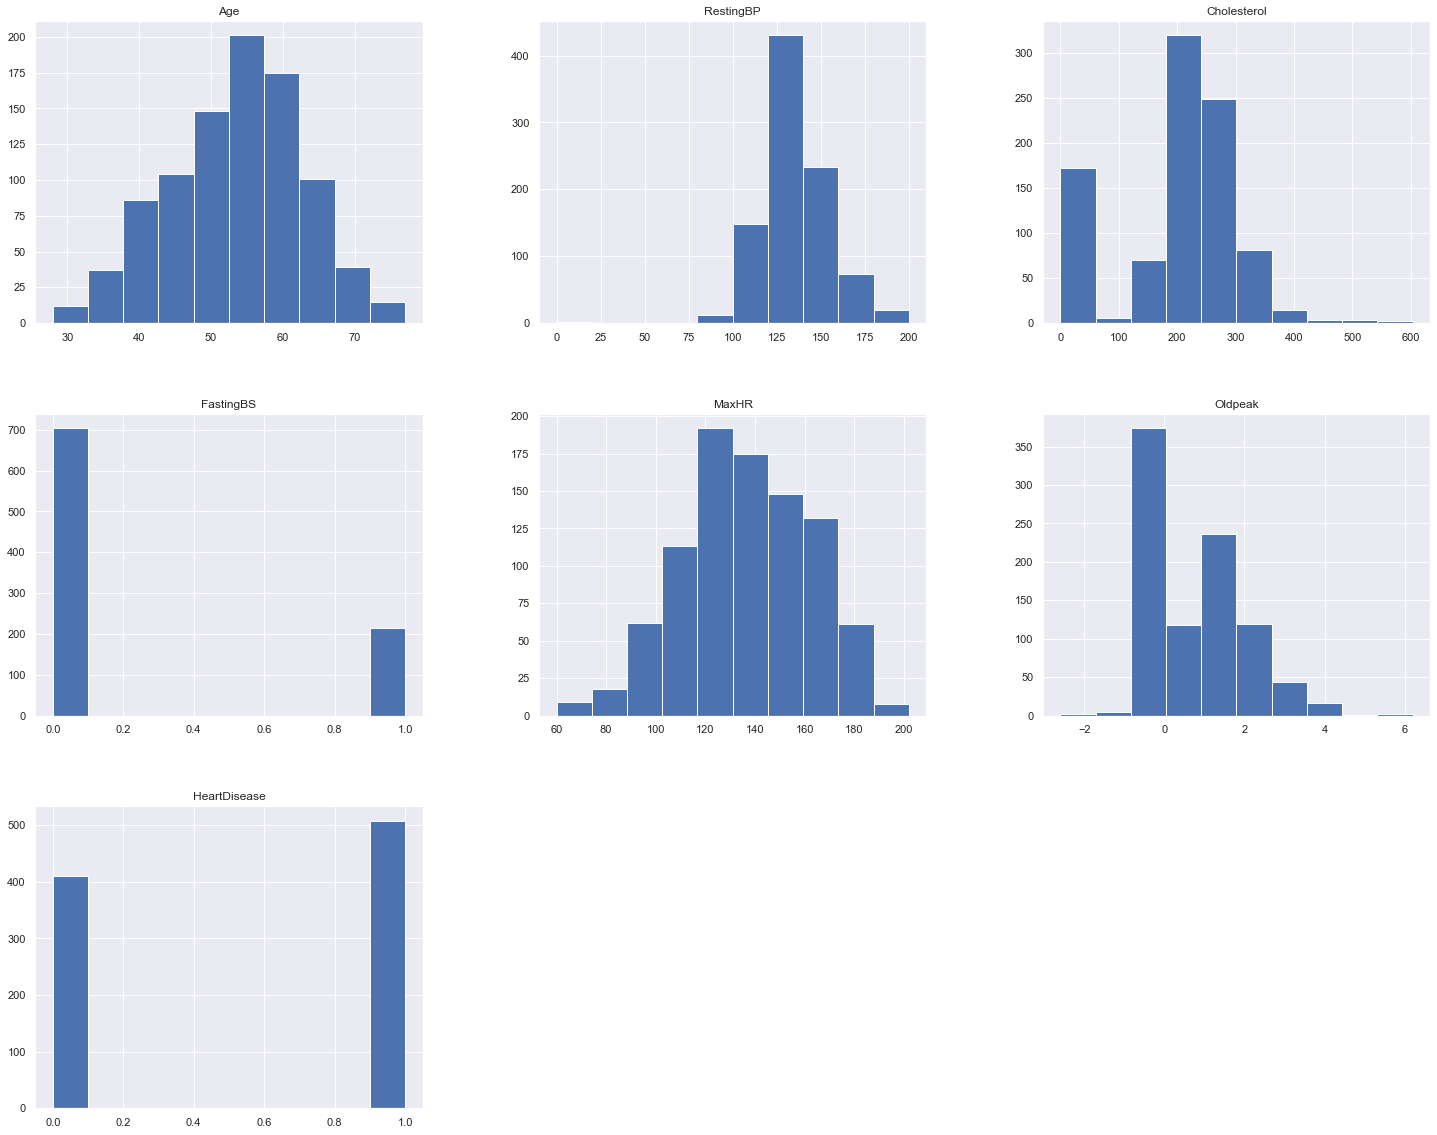

In [178]:
#Distribution Hist
# The most of features looks with a normal distribution, the most of observations are arround to the mean
df.hist(bins=10, figsize=(25, 20))

# Correlation Analysis
In this section we going to compare the combination of correlations of all variables, looking for a pattern that allows prove our hypotesis

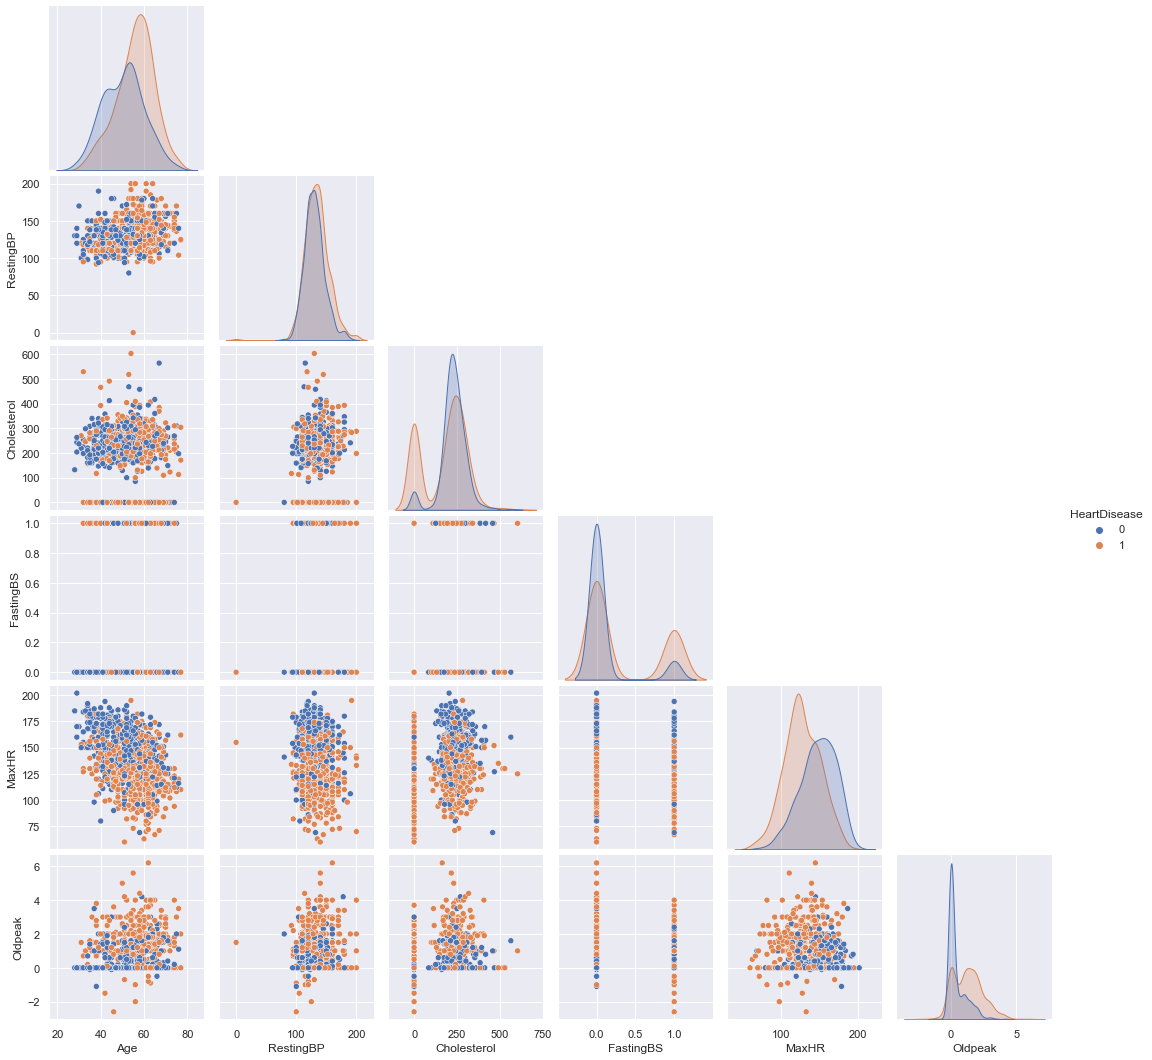

In [47]:
#pairwise bivariate distributions on a data set, you can use the function
sns.pairplot(df,hue='HeartDisease' , corner = True)
plt.show()

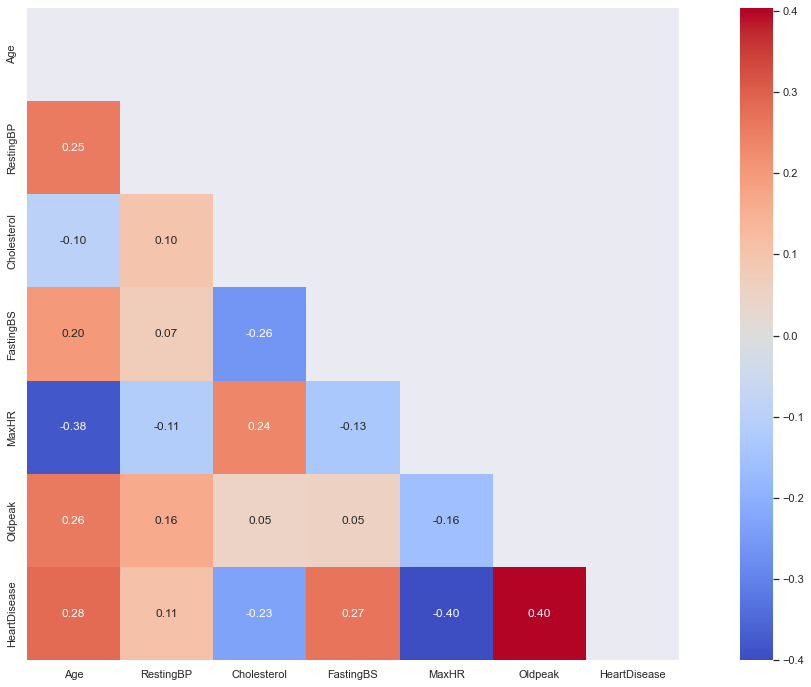

In [109]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

# Encode features

In [182]:
# LabelEncoder hep us to encode the categorical variables, the porpouse is has all features with numbers
df_encode = df.apply(LabelEncoder().fit_transform)
df_encode.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


### Preparation for model,
In this section we going to choose our variable of answer, and prepare the data for test diferent models of clasification. 

In [179]:
# First lets split our features, we need to define X and Y (Anser variable HeartDisease) 

In [199]:
# X all columns of dataframe except the last one (HeartDisease)
X = df_encode.iloc[:,:-1]

# Also we can normalice x features to test if they  fit better
# np.log1p apply logarithmic normalization to each variable en the dataframe
# Log 1 + x
X_norm = np.log1p(df_encode.iloc[:,:-1])

# Y The last Column (HeartDisease)
y = df_encode['HeartDisease']

In [200]:
print("X-> ",X.head().shape,"X-> ",X_norm.head().shape,"Y-> ",y.head().shape)


X->  (5, 11) X->  (5, 11) Y->  (5,)


In [206]:
# It is important to know if the amount of response is balanced
zeros = y[y==0].count()
ones = y[y==1].count()
zeros,ones


(410, 508)

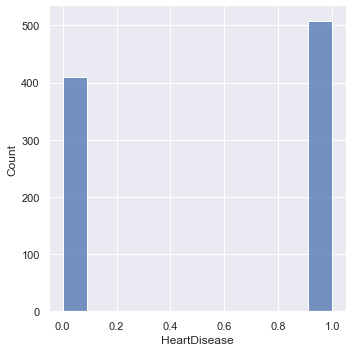

In [207]:
# Note that the height of both classes is similar, the set seems balanced
sns.displot(y)

In [208]:
#Let's split the training set and the validation set
"""A group for training, which has the purpose of finding out
if that person has the disease or not.."""

from sklearn.model_selection import train_test_split


In [239]:
#test_size with 30% of sample, random_state=1 to preserve the random events 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1)

In [240]:
X_train.head()
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
900,3.433987,0.693147,0.0,2.890372,5.153292,0.0,1.098612,4.204693,0.000000,3.912023,0.000000
570,3.367296,0.693147,0.0,3.401197,4.406719,0.0,1.098612,3.828641,0.693147,3.433987,0.000000
791,3.178054,0.693147,0.0,3.737670,5.049856,0.0,0.693147,3.891820,0.693147,3.891820,0.693147
189,3.258097,0.693147,0.0,4.143135,4.969813,0.0,1.098612,3.850148,0.693147,3.258097,0.693147
372,3.583519,0.693147,0.0,4.158883,0.000000,0.0,0.693147,3.258097,0.693147,2.397895,1.098612


# Building our classified
Given the nature of the dataset and the problem, we use two classification algorithms to evaluate different scenarios.

## DecisionTreeClassifier

In [241]:
#Lets start with a decision tree
from sklearn.tree import DecisionTreeClassifier

In [242]:
model = DecisionTreeClassifier(random_state=1)

In [243]:
#now let's train From the X_train training data, it will evaluate according to the response variable
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [244]:
y_prds = model.predict(X_test)

In [245]:
# Comparison of the model output, with the test data
benchmark = pd.DataFrame({'Real': y_test, 'preds': y_prds})
benchmark.head(10)

,Real,preds
900,1,1
570,1,0
791,1,1
189,1,1
372,1,0
191,0,0
643,1,0
474,0,1
65,0,0
890,0,1


In [246]:
from sklearn.metrics import accuracy_score

In [247]:
# The model has been successful in 77% of the cases :(
acc = accuracy_score(y_test,y_prds)
acc

0.7644927536231884

In [248]:
# Other way to measure the  accurracy is with a confusion matrix
""" 92 cases were zeros, 118 ones
"""
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prds)
cm

array([[ 90,  19],
       [ 46, 121]], dtype=int64)

In [249]:
# Lets import GridSearch to test differents parameters for dessision tree
from sklearn.model_selection import GridSearchCV

In [253]:
"""We are going to vary the parameters of the tree to find the best combination of these
and check if it is possible to improve the acurracy"""

params = [{'max_depth':[None,3,4,5],
           'max_features':[0.9,1],
           'min_samples_split':[0.7,0.8,0.95]}]

In [256]:
gs = GridSearchCV(cv=5, scoring='accuracy',estimator=DecisionTreeClassifier(),
                  n_jobs=-1, param_grid=params)

In [257]:
#Lets train again with these combinations
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [None, 3, 4, 5],
                          'max_features': [0.9, 1],
                          'min_samples_split': [0.7, 0.8, 0.95]}],
             scoring='accuracy')

In [258]:
# Find the best combination
gs.best_estimator_

DecisionTreeClassifier(max_features=0.9, min_samples_split=0.8)

In [259]:
gs.best_params_

{'max_depth': None, 'max_features': 0.9, 'min_samples_split': 0.8}

In [262]:
# Save opuput in y_prds_gs
y_prds_gs = gs.best_estimator_.predict(X_test)

In [267]:
y_prds_gs

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [264]:
#Compare again with the best estimator
benchmark = pd.DataFrame({'Real': y_test, 'preds': y_prds_gs})
benchmark.head(10)

,Real,preds
900,1,1
570,1,1
791,1,1
189,1,1
372,1,0
191,0,0
643,1,1
474,0,0
65,0,0
890,0,1


In [265]:
#The accuracy has improved al 83%
acc = accuracy_score(y_test,y_prds_gs)
acc

0.8297101449275363

In [295]:
# dtree = model.fit(xtree_train,ytree_train)
import graphviz
from sklearn.tree import export_graphviz


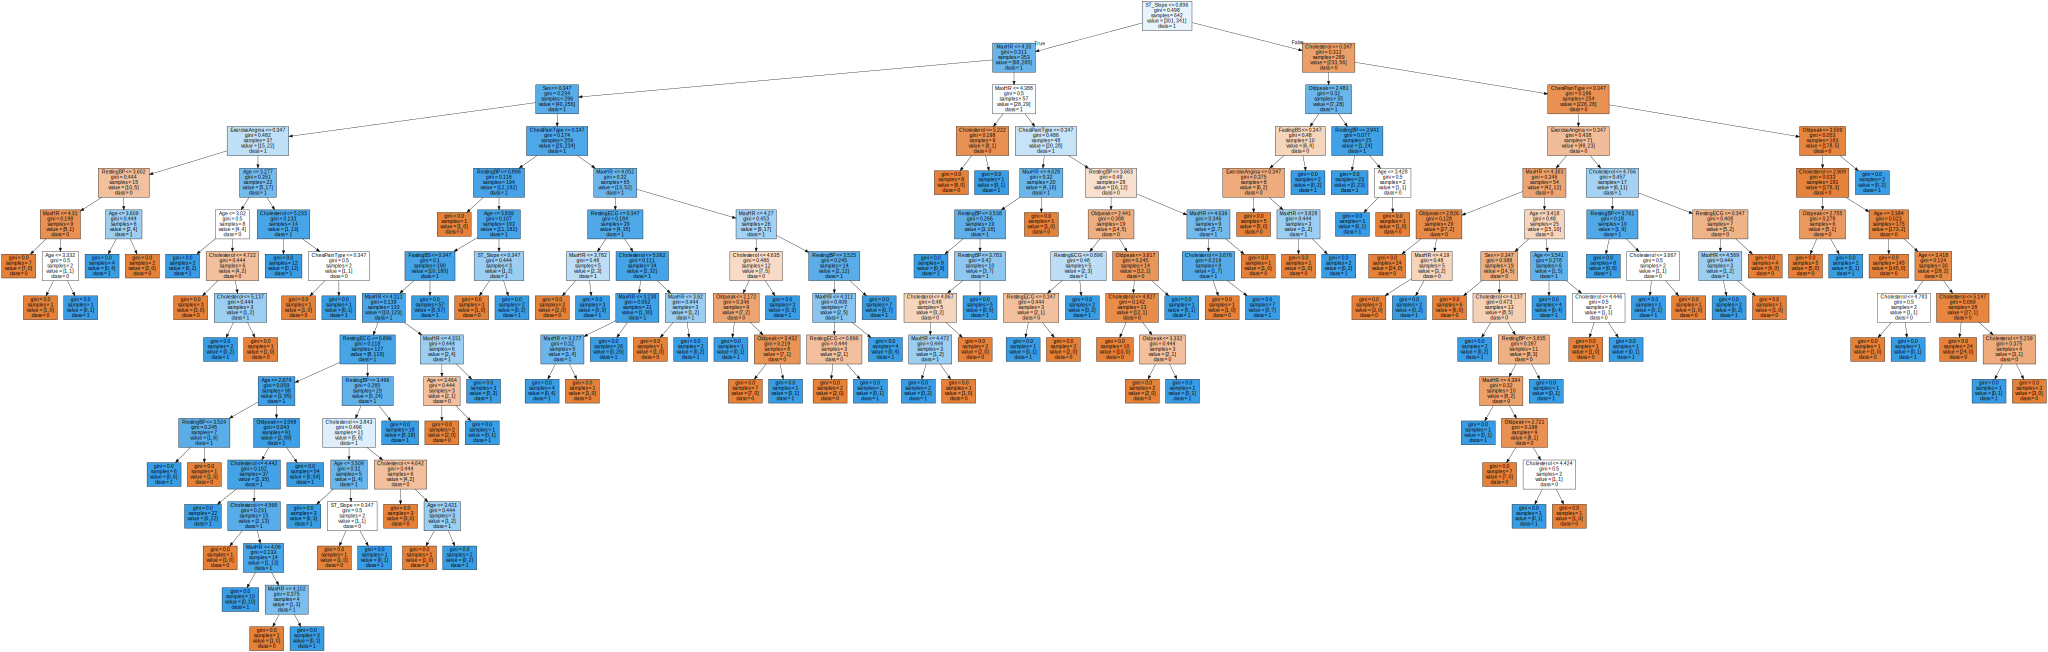

In [294]:
dtree = dtree = model.fit(X_train,y_train)
dot_data = export_graphviz(dtree,feature_names=X_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

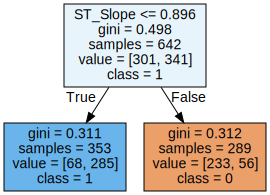

In [296]:

# Best Estimator
# DecisionTreeClassifier(max_features=0.9, min_samples_split=0.8)
dtree = gs.best_estimator_
dot_data = export_graphviz(dtree,feature_names=X_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

# Random Forest
This algorithm consists of creating N trees randomly and comparing those results to give a definitive result.

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [280]:
# n_estimators is the number of random trees
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

In [276]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1500, n_jobs=-1, random_state=1)

In [277]:
y_prds_rf = rf.predict(X_test)

In [278]:
y_prds_rf

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [279]:
# With random forest we have 88% of success
"""The accuracy has improved, this may be because in the 500 trees that he has randomly created,
he has been able to find certain patterns of the solution of these trees to improve the result.
"""
accuracy_score(y_test,y_prds_rf)

0.8731884057971014

# Logistic Regresion